In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [2]:
df_0405 = pd.read_csv('boxC/boxC_0405_refined.csv')
df_0607 = pd.read_csv('boxA/boxA_0607_refined.csv')
df_0809 = pd.read_csv('boxD/boxD_0809.csv')
df_1011 = pd.read_csv('boxA/boxA_1011.csv')
df_1213 = pd.read_csv('boxD/boxD_1213.csv')
df_1415 = pd.read_csv('boxE/boxE_1415.csv')
df_1617 = pd.read_csv('boxC/boxC_1617.csv')

vims_wave = np.loadtxt('vims_wave.txt')

In [3]:
%%capture --no-display
for df in (df_0405,df_0607,df_0809,df_1011,df_1213,df_1415,df_1617):
    for i in range(len(df['spectrum'])):
        df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

In [4]:
spectra_0405 = np.average(np.asarray(df_0405['spectrum']))
spectra_0607 = np.average(np.asarray(df_0607['spectrum']))
spectra_0809 = np.average(np.asarray(df_0809['spectrum']))
spectra_1011 = np.average(np.asarray(df_1011['spectrum']))
spectra_1213 = np.average(np.asarray(df_1213['spectrum']))
spectra_1415 = np.average(np.asarray(df_1415['spectrum']))
spectra_1617 = np.average(np.asarray(df_1617['spectrum']))

In [5]:
spectra_list = [spectra_0405,spectra_0607,spectra_0809,spectra_1011,spectra_1213,spectra_1415,spectra_1617]

## Fitting third degree curve to spectra (dependent on what variable is inserted as a spectra)

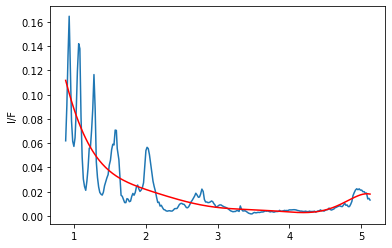

In [6]:
%matplotlib inline
x = vims_wave
y = spectra_0607
p = np.polyval(np.polyfit(x,y,8),x)
plt.plot(x,np.abs(y))
plt.plot(x,p,c='r')
plt.ylabel('I/F')
plt.show()

# Plotting 2004-2005 and 2008-2009 spectra respectively

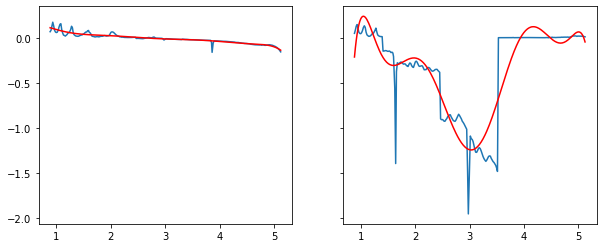

In [22]:
x = vims_wave
p1 = np.polyval(np.polyfit(x,spectra_0405,8),x)
p2 = np.polyval(np.polyfit(x,spectra_0809,8),x)
f, (ax1,ax2) = plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,4))
ax1.plot(x,spectra_0405)
ax1.plot(x,p1,c='r')
ax2.plot(x,spectra_0809)
ax2.plot(x,p2,c='r')
plt.show()

In [37]:
df_0809.median(numeric_only=True)

fileid       43962.000000
lineres      42814.482706
emission        28.428398
incidence       21.829885
latitude       -10.400769
longitude      125.599572
dtype: float64

# Attempting to find location of median of 2008-2009 spectrum

In [60]:
df_0809.loc[(df_0809['fileid'] == 43962) & (df_0809['latitude'] == -10.400769) & (df_0809['latitude'] >= -11) & (df_0809['longitude'] >= 120)]

,fileid,lineres,emission,incidence,latitude,longitude,spectrum


## Finding how many negative values are in each spectra

In [7]:
for spectra in spectra_list:
    k = 0
    for number in spectra:
        if number <= 0:
            k += 1
    print(k)
    
## only spectra_0405 & spectra_0809 contain negative values

150
0
128
0
0
0
0


### Only dataframes from 2004-2005 and 2008-2009 have negative values in them - why? Is this fixable?

In [35]:
k1 = 0
# boxC_0405 all negative values within dataframe
for spectrum in df_0405['spectrum']:
    for number in spectrum:
        if number <= 0:
            k1 += 1
print(k1)


10505


In [34]:
k2 = 0
# boxD_0809 all negative values within dataframe
for spectrum in df_0809['spectrum']:
    for number in spectrum:
        if number <= 0:
            k2 += 1
print(k2)

11743


In [36]:
n1 = 0
# boxC_0405 all positive values within dataframe
for spectrum in df_0405['spectrum']:
    for number in spectrum:
        if number > 0:
            n1 += 1
print(n1)

632567


In [44]:
n2 = 0
# boxD_0809 all positive values within dataframe
for spectrum in df_0809['spectrum']:
    for number in spectrum:
        if number > 0:
            n2 += 1
print(n2)

227105
